   fold  epoch  train_loss  val_loss  val_acc  val_f1  macro_f1
0     1      0      0.3272    0.2815   0.8899  0.8819    0.5837
1     1      1      0.2383    0.2735   0.8988  0.8918    0.6176
2     1      2      0.1733    0.2683   0.8966  0.8921    0.6307
3     1      3      0.1171    0.3384   0.8954  0.8920    0.6327
4     1      4      0.0543    0.3712   0.8976  0.8955    0.6523


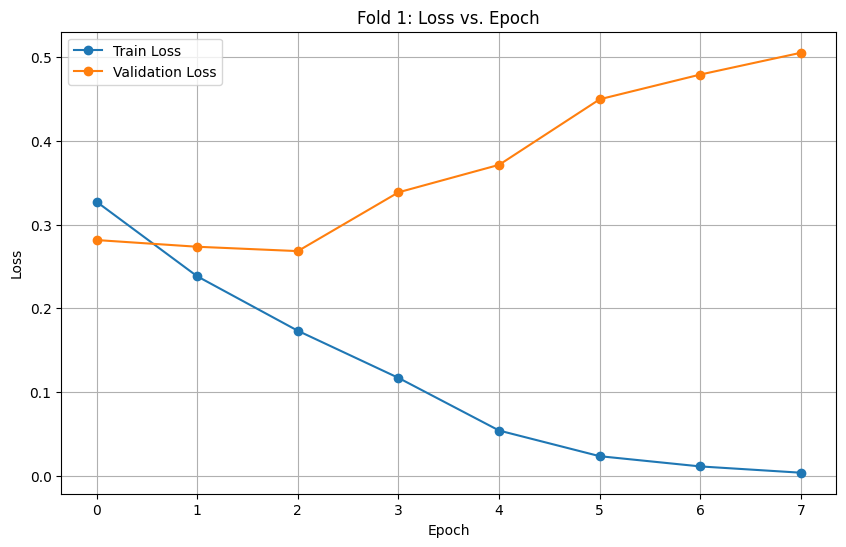

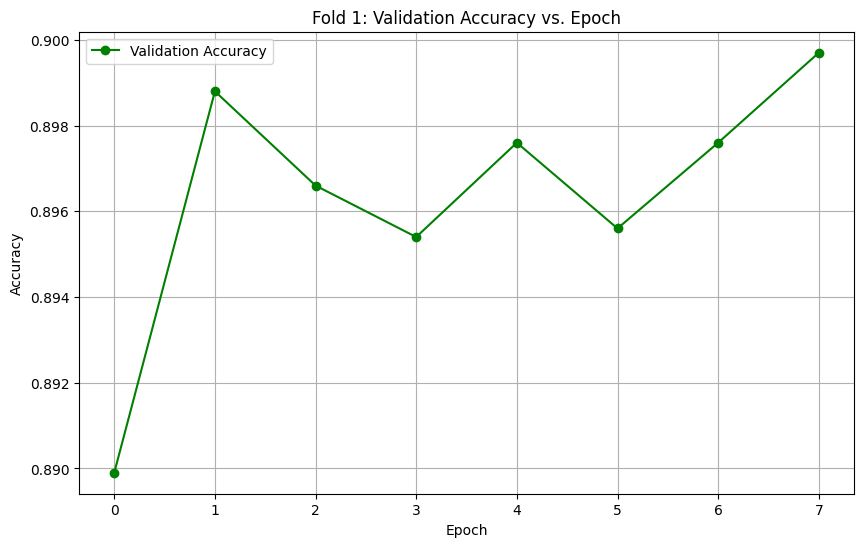

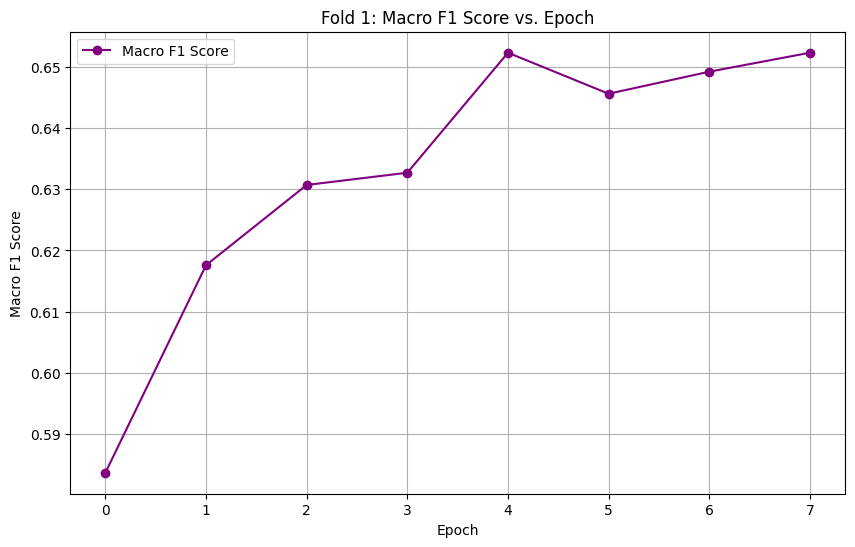

In [3]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# File containing your training logs
log_file = "train_log.txt"

# Open and read the log file
with open(log_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Prepare a list to store the parsed data
data = []
current_fold = None
current_epoch = None
train_loss = None
val_loss = None
val_acc = None
val_f1 = None
macro_f1 = None

# Parse the log line by line using regular expressions
for line in lines:
    line = line.strip()
    if not line:
        continue

    # Look for a fold line
    m = re.match(r'fold:\s*(\d+)', line)
    if m:
        current_fold = int(m.group(1))
        continue

    # Look for epoch information
    m = re.match(r'Epoch:\s*(\d+)', line)
    if m:
        current_epoch = int(m.group(1))
        continue

    # Train Loss
    m = re.match(r'Train Loss:\s*([\d\.]+)', line)
    if m:
        train_loss = float(m.group(1))
        continue

    # Validation Loss
    m = re.match(r'Validation Loss:\s*([\d\.]+)', line)
    if m:
        val_loss = float(m.group(1))
        continue

    # Validation Accuracy
    m = re.match(r'Validation Accuracy:\s*([\d\.]+)', line)
    if m:
        val_acc = float(m.group(1))
        continue

    # Validation F1 Score (we also have a macro f1 printed later)
    m = re.match(r'Validation F1 Score:\s*([\d\.]+)', line)
    if m:
        val_f1 = float(m.group(1))
        continue

    # Macro F1 Score: we expect a line like "macro f1:0.0000"
    m = re.match(r'macro f1:\s*([\d\.]+)', line)
    if m:
        macro_f1 = float(m.group(1))
        # Once macro f1 is read, we assume one complete epoch block has been parsed.
        data.append({
            "fold": current_fold,
            "epoch": current_epoch,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "val_f1": val_f1,
            "macro_f1": macro_f1
        })
        continue

# Convert the collected data into a pandas DataFrame
df = pd.DataFrame(data)
print(df.head())

# Plot the metrics for each fold separately
folds = df['fold'].unique()
for fold in folds:
    df_fold = df[df['fold'] == fold]
    
    # Plot Loss vs. Epoch
    plt.figure(figsize=(10, 6))
    plt.plot(df_fold['epoch'], df_fold['train_loss'], marker='o', label='Train Loss')
    plt.plot(df_fold['epoch'], df_fold['val_loss'], marker='o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold}: Loss vs. Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Validation Accuracy vs. Epoch
    plt.figure(figsize=(10, 6))
    plt.plot(df_fold['epoch'], df_fold['val_acc'], marker='o', color='green', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold}: Validation Accuracy vs. Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Macro F1 Score vs. Epoch
    plt.figure(figsize=(10, 6))
    plt.plot(df_fold['epoch'], df_fold['macro_f1'], marker='o', color='purple', label='Macro F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Macro F1 Score')
    plt.title(f'Fold {fold}: Macro F1 Score vs. Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
